# 1. Problem Statement

We are provided the data collected by the city corporation for a time period of 1990 to 2005 , based on this data we have to predict the the tax revenue collection for the next 12 months or say 1 year.

# 2. Machine Learning Problem Formulation

## 2.1

### 2.1.1 Data Overview

- Data will be in a file named as 'Tax Revenue Forecasting.xlsx' 
- Tax Revenue Forecasting.xlsx contains 20 columns
- Size of Tax Revenue Forecasting.xlsx - 50 KB
- Number of rows in Tax Revenue Forecasting.xlsx = 193

### 2.1.2 Example Datapoint

## 2.2 Mapping the real world problem to an ML problem

### 2.2.1 Type of Machine Leaning Problem 

As we have to predict the Tax revenue collection for the next 1 year so this is an Time series Forecasting problem and as the 
values are real numbers this is a Regression problem (Supervised Learning problem).

# 3. Exploratory Data Analysis

In [1]:
# importing all the required libraries, modules and packages for our assignment...

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from terminaltables import AsciiTable

## 3.1 Reading data and basic statistics

In [2]:
# we are having the file in .xlsx format , we will read our file in this cell 

data = pd.read_excel('Tax Revenue Forecasting.xlsx')

In [3]:
data.head(2)

,Date,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
0,NaT,p_stnet,us_rsfsxmv,us_dpisa,p_emp,us_isratio,us_businv,us_pcesa,us_pisa,us_fedfunds,us_mortg,us_ipindex,dpi_bizcycle,dpi_coincident,us_manufindex,us_retailfoodsales,p_newresprmts,us_prime,cc_sfpunits,NaN
1,1990-01-01,NaN,125981,4170.4,75100,NaN,NaN,3754.5,4744.3,8.23,9.9,68.677,135.371,109.692,47.2,NaN,NaN,10.11,NaN,NaN


In [4]:
# Drop first row 
# by selecting all rows from first row onwards

df = data.iloc[1: , :]

In [5]:
df.head(2)

,Date,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
1,1990-01-01,NaN,125981,4170.4,75100,NaN,NaN,3754.5,4744.3,8.23,9.9,68.677,135.371,109.692,47.2,NaN,NaN,10.11,NaN,NaN
2,1990-02-01,2.06859e+06,127080,4202.8,75273,NaN,NaN,3752.2,4784.2,8.24,10.2,69.266,135.587,110.201,49.1,NaN,NaN,10,NaN,NaN


In [6]:
# number of datapoints of the given dataset is 193

print("Number of data points:",df.shape[0])

Number of data points: 192


In [7]:
# shape of the given dataset 

df.shape

(192, 20)

In [8]:
# .size returns total number of elements, it is compared by multiplying rows and columns returned by the shape method
#  here 192*20 = 3840

df.size

3840

In [9]:
# Also, ndim for dataframe was 2 and series is 1 which is true for all kind of dataframes and series.

df.ndim

2

In [10]:
# Printing first 2 rows 

df.head(2)

,Date,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
1,1990-01-01,NaN,125981,4170.4,75100,NaN,NaN,3754.5,4744.3,8.23,9.9,68.677,135.371,109.692,47.2,NaN,NaN,10.11,NaN,NaN
2,1990-02-01,2.06859e+06,127080,4202.8,75273,NaN,NaN,3752.2,4784.2,8.24,10.2,69.266,135.587,110.201,49.1,NaN,NaN,10,NaN,NaN


In [11]:
# printing last 2 rows

df.tail(2)

,Date,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
191,2005-11-01,5.38422e+06,280533,9229.5,137440,1.26,1294786,8916.4,10463.8,4,6.33,109.547,195.153,168.303,57.3,352745,44,7,1060,5.390359e+06
192,2005-12-01,4.09854e+06,280958,9265,334276,1.25,1303747,8996.6,10504.9,4.16,6.27,110.539,195.588,168.71,55.6,415577,35,7.15,1013,3.622492e+06


In [12]:
# Generate descriptive statistics.

df.describe()

,Forecasted Net Sales Tax Revenue Payment
count,1.540000e+02
mean,3.250392e+06
std,1.135505e+06
min,1.184012e+06
25%,2.422878e+06
50%,3.245872e+06
75%,3.774111e+06
max,6.315689e+06


In [13]:
df = df.set_index('Date')

In [14]:
df.head(1)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
Date,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,125981,4170.4,75100,NaN,NaN,3754.5,4744.3,8.23,9.9,68.677,135.371,109.692,47.2,NaN,NaN,10.11,NaN,NaN


In [15]:
# Print a concise summary of a DataFrame.
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 1990-01-01 to 2005-12-01
Data columns (total 19 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Tax Revenue                                                                                      191 non-null    object 
 1   Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted  192 non-null    object 
 2   Disposable Personal Income - Seasonally Adjusted Annual Rate                                     192 non-null    object 
 3   Employment                                                                                       192 non-null    object 
 4   Inventory to Sales Ratio: Total Business                                                         168 non-null    ob

In [16]:
df.head(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
Date,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,125981,4170.4,75100,NaN,NaN,3754.5,4744.3,8.23,9.9,68.677,135.371,109.692,47.2,NaN,NaN,10.11,NaN,NaN
1990-02-01,2.06859e+06,127080,4202.8,75273,NaN,NaN,3752.2,4784.2,8.24,10.2,69.266,135.587,110.201,49.1,NaN,NaN,10,NaN,NaN


In [17]:
# converting dtypes: float64(1), object(18) to dtypes: float64(18), int64(1)

df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [18]:
df.head(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
Date,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,125981,4170.4,75100.0,NaN,NaN,3754.5,4744.3,8.23,9.9,68.677,135.371159,109.692190,47.2,NaN,NaN,10.11,NaN,NaN
1990-02-01,2068592.33,127080,4202.8,75273.0,NaN,NaN,3752.2,4784.2,8.24,10.2,69.266,135.586717,110.200967,49.1,NaN,NaN,10.00,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 1990-01-01 to 2005-12-01
Data columns (total 19 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Tax Revenue                                                                                      191 non-null    float64
 1   Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted  192 non-null    int64  
 2   Disposable Personal Income - Seasonally Adjusted Annual Rate                                     192 non-null    float64
 3   Employment                                                                                       192 non-null    float64
 4   Inventory to Sales Ratio: Total Business                                                         168 non-null    fl

In [20]:
# We can see here that these are the only columns with null values :

df.columns[df.isna().any()].tolist()

['Tax Revenue',
 'Inventory to Sales Ratio: Total Business',
 'Inventories: Total Business',
 'Retail and Food Services Sales - Not Seasonally Adjusted',
 'New Residential Permits Issued',
 'Single Family Building Permits - Units',
 'Forecasted Net Sales Tax Revenue Payment']

In [21]:
# getting the number of of null values in each column

df.isna().sum()

Tax Revenue                                                                                         1
Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted     0
Disposable Personal Income - Seasonally Adjusted Annual Rate                                        0
Employment                                                                                          0
Inventory to Sales Ratio: Total Business                                                           24
Inventories: Total Business                                                                        24
Personal Consumption Expenditures - Seasonally Adjusted Annual Rate                                 0
Personal Income - Seasonally Adjusted Annual Rate                                                   0
Effective Federal Funds Rate                                                                        0
30-Year Conventional Mortgage Rate                                                

In [22]:
# total number of null values 

df.isna().sum().sum()

243

In [23]:
#  In this we will get the count of all the rows that have missing values somewhere

sum([True for idx,row in df.iterrows() if any(row.isnull())])

84

## 3.2 Removing the rows which are having NaN counts upto 5 

In [24]:
df.shape

(192, 19)

In [25]:
df.size

3648

In [26]:
df.isna().sum().sum()

243

In [27]:
# percent of missing points in our data 

percent_missing_data = ((df.isna().sum().sum()/df.size)*100)
print("percent_missing_data is ",percent_missing_data,'%')

percent_missing_data is  6.661184210526317 %


In [28]:
df = df[df.isnull().sum(axis=1) <= 5]

In [29]:
df.isna().sum()

Tax Revenue                                                                                         0
Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted     0
Disposable Personal Income - Seasonally Adjusted Annual Rate                                        0
Employment                                                                                          0
Inventory to Sales Ratio: Total Business                                                            0
Inventories: Total Business                                                                         0
Personal Consumption Expenditures - Seasonally Adjusted Annual Rate                                 0
Personal Income - Seasonally Adjusted Annual Rate                                                   0
Effective Federal Funds Rate                                                                        0
30-Year Conventional Mortgage Rate                                                

In [30]:
# percent of missing points in our data 

percent_missing_data = ((df.isna().sum().sum()/df.size)*100)
print("percent_missing_data is",percent_missing_data,'%')

percent_missing_data is 3.070175438596491 %


In [31]:
df.isna().sum().sum()

98

In [32]:
df.shape

(168, 19)

In [33]:
df.head(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Forecasted Net Sales Tax Revenue Payment
Date,,,,,,,,,,,,,,,,,,,
1992-01-01,1075763.33,130261,4619.4,79296.0,1.56,808303.0,4128.2,5200.1,4.03,8.43,68.495,135.559611,113.864157,47.3,145924.0,NaN,6.5,NaN,NaN
1992-02-01,2341126.51,130356,4658.4,79645.0,1.55,809795.0,4141.8,5245.8,4.06,8.76,68.986,135.699547,114.016790,52.7,146644.0,NaN,6.5,NaN,NaN


In [34]:
df_forecast = df["Forecasted Net Sales Tax Revenue Payment"]
df = df.drop('Forecasted Net Sales Tax Revenue Payment', 1)


In [35]:
print(df_forecast)

Date
1992-01-01             NaN
1992-02-01             NaN
1992-03-01             NaN
1992-04-01             NaN
1992-05-01             NaN
                  ...     
2005-08-01    5.523326e+06
2005-09-01    3.931564e+06
2005-10-01    3.860091e+06
2005-11-01    5.390359e+06
2005-12-01    3.622492e+06
Name: Forecasted Net Sales Tax Revenue Payment, Length: 168, dtype: float64


In [36]:
df.head(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units
Date,,,,,,,,,,,,,,,,,,
1992-01-01,1075763.33,130261,4619.4,79296.0,1.56,808303.0,4128.2,5200.1,4.03,8.43,68.495,135.559611,113.864157,47.3,145924.0,NaN,6.5,NaN
1992-02-01,2341126.51,130356,4658.4,79645.0,1.55,809795.0,4141.8,5245.8,4.06,8.76,68.986,135.699547,114.016790,52.7,146644.0,NaN,6.5,NaN


In [37]:
df.isna().sum()

Tax Revenue                                                                                         0
Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted     0
Disposable Personal Income - Seasonally Adjusted Annual Rate                                        0
Employment                                                                                          0
Inventory to Sales Ratio: Total Business                                                            0
Inventories: Total Business                                                                         0
Personal Consumption Expenditures - Seasonally Adjusted Annual Rate                                 0
Personal Income - Seasonally Adjusted Annual Rate                                                   0
Effective Federal Funds Rate                                                                        0
30-Year Conventional Mortgage Rate                                                

## 3.3 Handling missing values

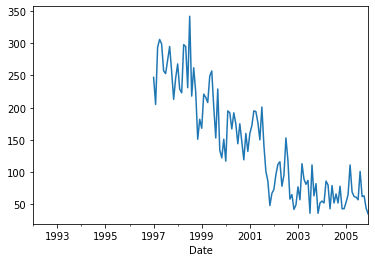

In [38]:
df['New Residential Permits Issued'].plot()

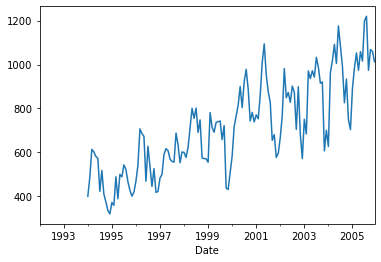

In [39]:
df['Single Family Building Permits - Units'].plot()

#### In both of the above graphs we can see the broken line plots representing NaN values or missing data

In [40]:
df = df.interpolate(method='linear', limit_direction='backward', axis=0)

In [41]:
df.isna().sum()

Tax Revenue                                                                                        0
Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted    0
Disposable Personal Income - Seasonally Adjusted Annual Rate                                       0
Employment                                                                                         0
Inventory to Sales Ratio: Total Business                                                           0
Inventories: Total Business                                                                        0
Personal Consumption Expenditures - Seasonally Adjusted Annual Rate                                0
Personal Income - Seasonally Adjusted Annual Rate                                                  0
Effective Federal Funds Rate                                                                       0
30-Year Conventional Mortgage Rate                                                         

In [42]:
# percent of missing points in our data 

percent_missing_data = ((df.isna().sum().sum()/df.size)*100)
print("percent_missing_data is",percent_missing_data,'%')

percent_missing_data is 0.0 %


In [43]:
print(df.shape)
print(df.size)

(168, 18)
3024


In [44]:
df.head(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units
Date,,,,,,,,,,,,,,,,,,
1992-01-01,1075763.33,130261,4619.4,79296.0,1.56,808303.0,4128.2,5200.1,4.03,8.43,68.495,135.559611,113.864157,47.3,145924.0,247.0,6.5,400.0
1992-02-01,2341126.51,130356,4658.4,79645.0,1.55,809795.0,4141.8,5245.8,4.06,8.76,68.986,135.699547,114.016790,52.7,146644.0,247.0,6.5,400.0


## 3.4 Line plots for all the features in our dataset

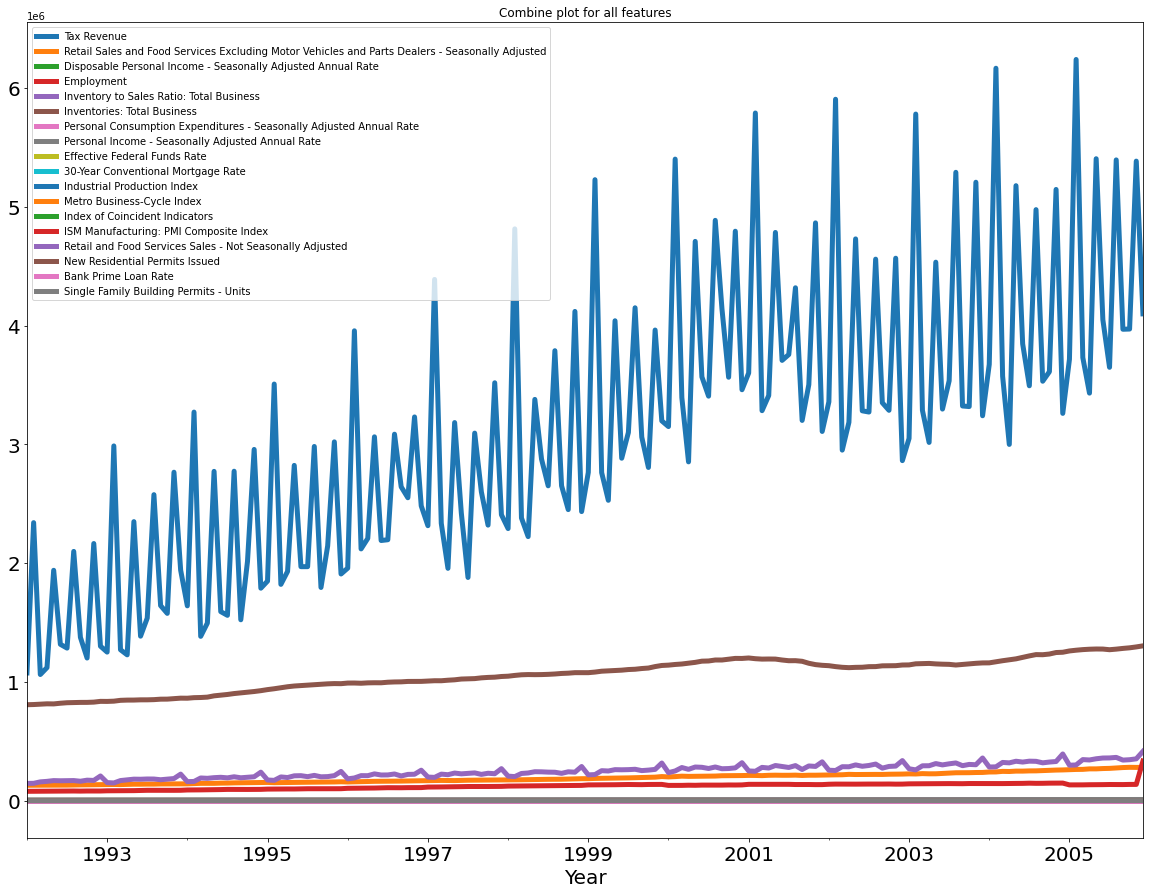

In [45]:
df.plot(figsize=(20,15), linewidth=5, fontsize=20)
plt.title("Combine plot for all features")
plt.xlabel('Year', fontsize=20);

## 3.5 Checking trend and seasonality in our dataset

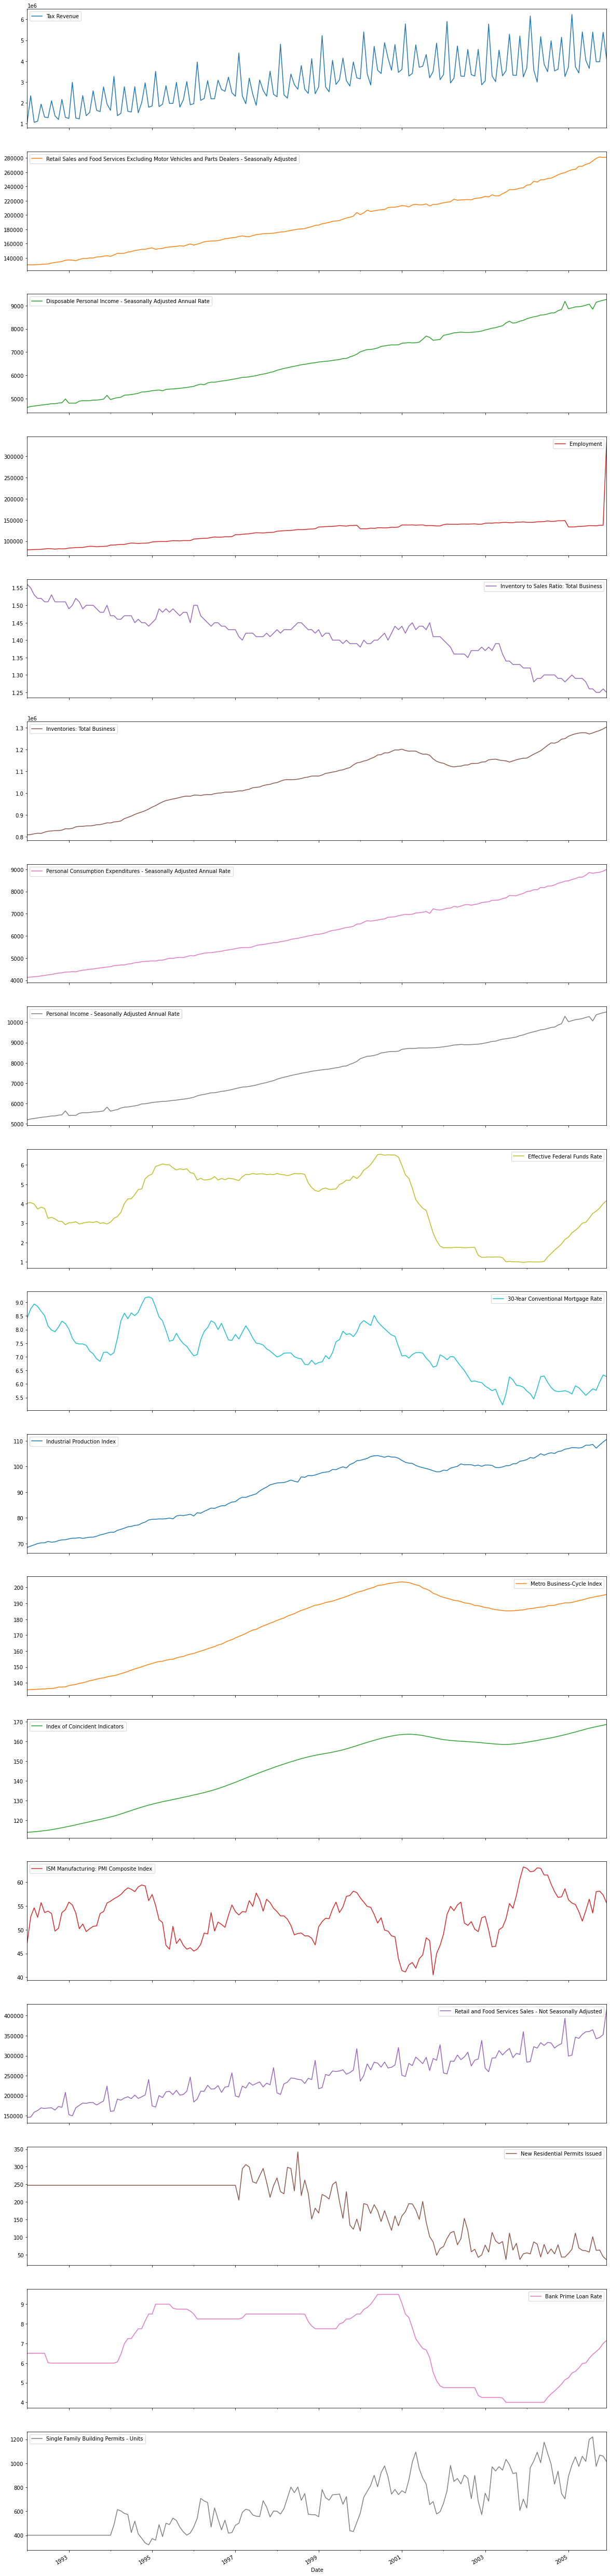

In [46]:
# printing plots seperately for each column to check seasonality and trend

print(df.plot(subplots = True,figsize=(20,100)))

### Observation :

1. In all the above graphs we can see that as the values are missing so the graph is broken in that particular duration of time or span.


2. Graphs (columns) having trend and seasonality are :

 - Tax Revenue 
 - Retail and Food Services Sales - Not Seasonally Adjusted    


3. Graphs (columns) having trend but not seasonality are :

 - Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted     
 - Disposable Personal Income - Seasonally Adjusted Annual Rate                                        
 - Eployment  
 - Inventory to Sales Ratio: Total Business  
 - Inventories: Total Business 
 - Personal Consumption Expenditures - Seasonally Adjusted Annual Rate                          
 - Personal Income - Seasonally Adjusted Annual Rate   
 - Industrial Production Index                                                                         
 - Metro Business-Cycle Index                                                                          
 - Index of Coincident Indicators 
 - Inventory to Sales Ratio: Total Business 
 - New Residential Permits Issued   
 - Single Family Building Permits - Units


4. Above graphs(columns) having neither trend and nor seasonality are :
 
 - Bank Prime Loan Rate  
 - ISM Manufacturing: PMI Composite Index
 - 30-Year Conventional Mortgage Rate
 - Effective Federal Funds Rate


## 3.6 Checking stationarity using Augmented Dickey Fuller Test (ADF Test)

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.

The p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
# ADF Test
result = adfuller(df['Tax Revenue'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -0.7785221757785521
n_lags: 14
p-value: 0.8253497538973174
Critial Values:
   1%, -3.473829775724492
Critial Values:
   5%, -2.880622899711496
Critial Values:
   10%, -2.5769448985432954


### Observation :
 
The p-value is obtained is 0.825 which is greater than significance level of 0.05 and the ADF statistic= -0.7785 is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is non-stationary.

So, we have to convert our data to stationary using any of the suitable method.

1. Differencing
2. Random walk model
3. Second-order differencing
4. Seasonal differencing
5. Unit root tests
6. Transformations

## 3.7 Converting our data from non-stationary to stationary 

After implmenting all the above mentioned options I have choosen approach of differencing. 
So, we will first take difference of Tax Revenue using shift = 12 , as we are having 12 months in a year.

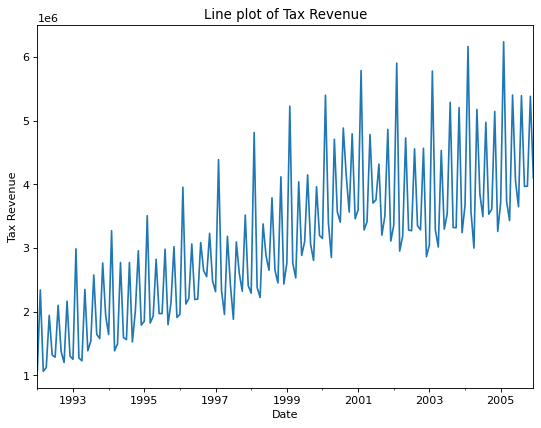

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Line plot of Tax Revenue")
plt.ylabel("Tax Revenue")
df['Tax Revenue'].plot()

In [50]:
df['Seasonal First Difference'] = df['Tax Revenue']-df['Tax Revenue'].shift(12)

In [51]:
df.head(14)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,,
1992-01-01,1075763.33,130261,4619.4,79296.0,1.56,808303.0,4128.2,5200.1,4.03,8.43,68.495,135.559611,113.864157,47.3,145924.0,247.0,6.50,400.0,NaN
1992-02-01,2341126.51,130356,4658.4,79645.0,1.55,809795.0,4141.8,5245.8,4.06,8.76,68.986,135.699547,114.016790,52.7,146644.0,247.0,6.50,400.0,NaN
1992-03-01,1062448.90,130277,4676.5,80171.0,1.53,813225.0,4157.6,5268.2,3.98,8.94,69.494,135.743779,114.169423,54.6,158809.0,247.0,6.50,400.0,NaN
1992-04-01,1120897.73,130678,4696.2,80308.0,1.52,815848.0,4169.8,5296.3,3.73,8.85,69.967,135.976844,114.322055,52.6,163135.0,247.0,6.50,400.0,NaN
1992-05-01,1939866.07,130981,4718.6,80533.0,1.52,815037.0,4195.5,5324.2,3.82,8.67,70.250,136.071033,114.525566,55.7,169545.0,247.0,6.50,400.0,NaN
1992-06-01,1316906.54,131222,4733.5,81489.0,1.51,820755.0,4213.8,5342.6,3.76,8.51,70.254,136.097561,114.729077,53.6,168078.0,247.0,6.50,400.0,NaN
1992-07-01,1284888.04,131620,4750.8,82275.0,1.51,825001.0,4241.8,5360.4,3.25,8.13,70.815,136.384706,114.932587,53.9,169322.0,247.0,6.02,400.0,NaN
1992-08-01,2098891.46,132877,4777.9,81901.0,1.53,826435.0,4258.8,5392.8,3.30,7.98,70.494,136.400486,115.237853,53.4,169807.0,247.0,6.00,400.0,NaN
1992-09-01,1375423.19,133510,4777.2,81086.0,1.51,827744.0,4292.5,5394.4,3.22,7.92,70.644,136.647926,115.543119,49.7,164092.0,247.0,6.00,400.0,NaN


#### In the Seasonal First Difference column first 12 columns are NaN as we have used shift = 12.

#### After creating new column named 'Seasonal First Difference' we will check its stationarity using ADF Test.

In [52]:
# ADF Test
result = adfuller(df['Seasonal First Difference'].dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.84569401752861
n_lags: 11
p-value: 0.0024729212258362823
Critial Values:
   1%, -3.476597917537401
Critial Values:
   5%, -2.8818291230495543
Critial Values:
   10%, -2.5775887982253085


### Observation

1. The p-value obtained is 0.00247 which is less than the significance level (say 0.05) in order to reject the null hypothesis.    Thereby, inferring that the series is stationary.

2. Here, ADF test statistic value of -3.845. The more negative this statistic, the more likely we are to reject the null          hypothesis (we have a stationary dataset).

3. As part of the output, We can see that our statistic value of -3.845 is less than the value of -3.476 at 1 %.

4. This suggests that we can reject the null hypothesis with a significance level of less than 1% .
   Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or
   does not have time-dependent structure.

Reference : https://machinelearningmastery.com/time-series-data-stationary-python/

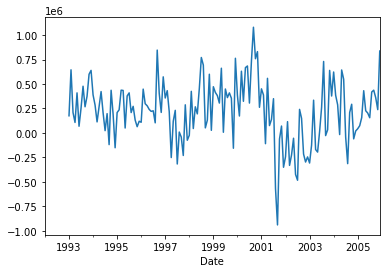

In [53]:
# checking for stationarity again

df['Seasonal First Difference'].plot()

#### From above plot also we can easily observe that our data has obtained stationarity.

# 4. Machine Learning Model

###  4.1 Auto Regressive Model

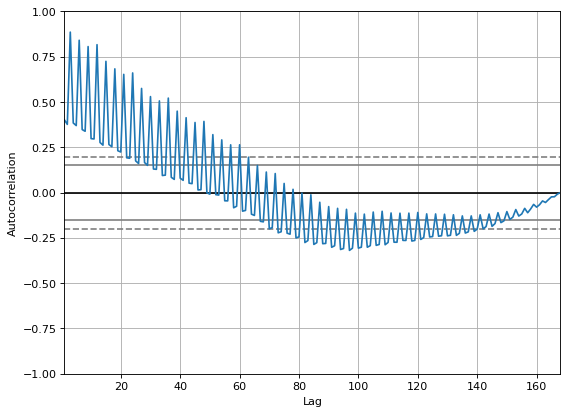

In [54]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
pd.plotting.autocorrelation_plot(df['Tax Revenue'])
plt.show()


### 4.2  Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.

- For an AR model, the theoretical PACF “shuts off” past the order of the model.
The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


Identification of an MA model is often best done with the ACF rather than the PACF.

- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

Reference - Krish naik

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

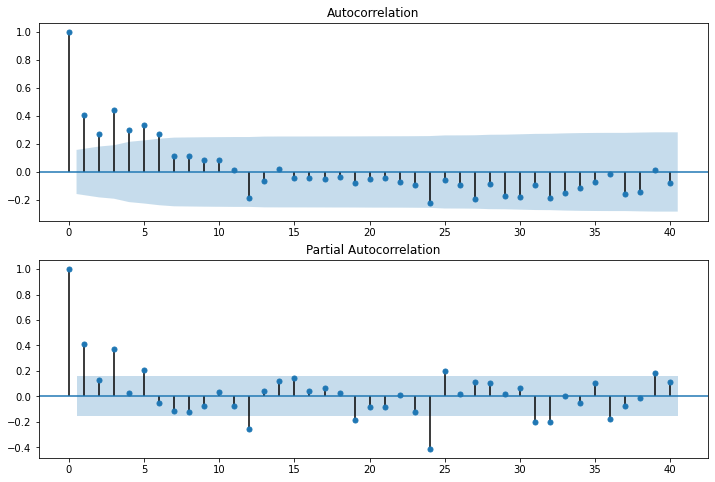

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [57]:
import statsmodels.api as sm

In [58]:
# order(p,d,q)
model = sm.tsa.statespace.SARIMAX(df['Tax Revenue'],order=(4, 1, 0),seasonal_order=(4,1,0,12))
results = model.fit()

C:\Users\prajwal.PIDEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prajwal.PIDEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
# checking first and last row

df2 = df.iloc[[0, 167]]
df2

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,,
1992-01-01,1075763.33,130261,4619.4,79296.00,1.56,808303.0,4128.2,5200.1,4.03,8.43,68.495,135.559611,113.864157,47.3,145924.0,247.0,6.50,400.0,NaN
2005-12-01,4098537.70,280958,9265.0,334275.75,1.25,1303747.0,8996.6,10504.9,4.16,6.27,110.539,195.588455,168.710252,55.6,415577.0,35.0,7.15,1013.0,837940.92


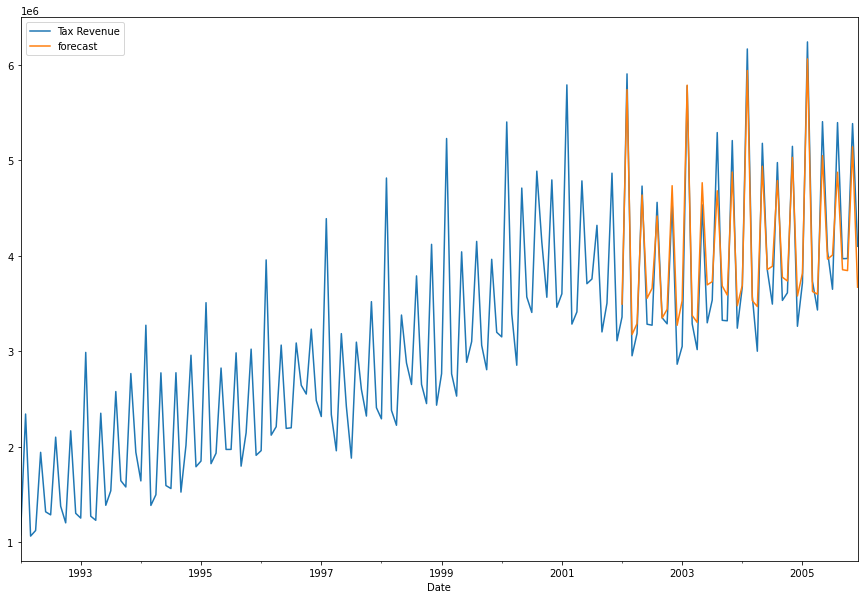

In [60]:
# Predicting values for last 47 data points

df['forecast']=results.predict(start=120,end=167,dynamic=True)
df[['Tax Revenue','forecast']].plot(figsize=(15,10))

In [61]:
# Forecasting data for next 12 months

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,13)]

In [62]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [63]:
future_datest_df.tail(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Seasonal First Difference,forecast
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
future_df=pd.concat([df,future_datest_df])
future_df.tail(2)

,Tax Revenue,Retail Sales and Food Services Excluding Motor Vehicles and Parts Dealers - Seasonally Adjusted,Disposable Personal Income - Seasonally Adjusted Annual Rate,Employment,Inventory to Sales Ratio: Total Business,Inventories: Total Business,Personal Consumption Expenditures - Seasonally Adjusted Annual Rate,Personal Income - Seasonally Adjusted Annual Rate,Effective Federal Funds Rate,30-Year Conventional Mortgage Rate,Industrial Production Index,Metro Business-Cycle Index,Index of Coincident Indicators,ISM Manufacturing: PMI Composite Index,Retail and Food Services Sales - Not Seasonally Adjusted,New Residential Permits Issued,Bank Prime Loan Rate,Single Family Building Permits - Units,Seasonal First Difference,forecast
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


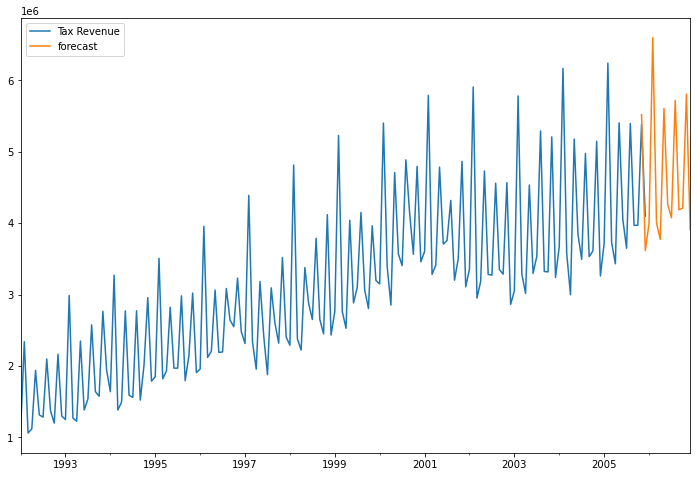

In [65]:
future_df['forecast'] = results.predict(start = 166, end = 180, dynamic= True)  
future_df[['Tax Revenue', 'forecast']].plot(figsize=(12, 8))

In [66]:
future_df['forecast'].tail(12)

2006-01-01    3.995042e+06
2006-02-01    6.595667e+06
2006-03-01    4.001810e+06
2006-04-01    3.774597e+06
2006-05-01    5.603620e+06
2006-06-01    4.258712e+06
2006-07-01    4.075489e+06
2006-08-01    5.719694e+06
2006-09-01    4.188211e+06
2006-10-01    4.210055e+06
2006-11-01    5.804943e+06
2006-12-01    3.906741e+06
Name: forecast, dtype: float64

### 4.3 Conclusion :


In [69]:

results_data = [
    ["2006-01-01","Predicted Tax Revenue"],
    ['2006-01-01', '3.995042e+06'],
    ['2006-02-01','6.595667e+06'],
    ['2006-03-01' ,'4.001810e+06'],
    ['2006-04-01' , '3.774597e+06'],
    ['2006-05-01' , '5.603620e+06'],
    ['2006-06-01' , '4.258712e+06'],
['2006-07-01' , '4.075489e+06'],
['2006-08-01', '5.719694e+06'],
['2006-09-01', '4.188211e+06'],
['2006-10-01', '4.210055e+06'],
['2006-11-01',  '5.804943e+06'],
['2006-12-01',  '3.906741e+06']
]

In [70]:
table = AsciiTable(results_data)
print("\n Prediction of Tax Revenue for year 2006 is:\n")
print(table.table)


 Prediction of Tax Revenue for year 2006 is:

+------------+-----------------------+
| 2006-01-01 | Predicted Tax Revenue |
+------------+-----------------------+
| 2006-01-01 | 3.995042e+06          |
| 2006-02-01 | 6.595667e+06          |
| 2006-03-01 | 4.001810e+06          |
| 2006-04-01 | 3.774597e+06          |
| 2006-05-01 | 5.603620e+06          |
| 2006-06-01 | 4.258712e+06          |
| 2006-07-01 | 4.075489e+06          |
| 2006-08-01 | 5.719694e+06          |
| 2006-09-01 | 4.188211e+06          |
| 2006-10-01 | 4.210055e+06          |
| 2006-11-01 | 5.804943e+06          |
| 2006-12-01 | 3.906741e+06          |
+------------+-----------------------+
